In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np
from sklearn.cluster import KMeans

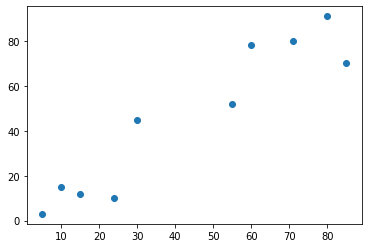

In [6]:
X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])
plt.scatter(X[ : ,0], X[ : ,1], label='True Position')
plt.show()

In [5]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [7]:
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0]


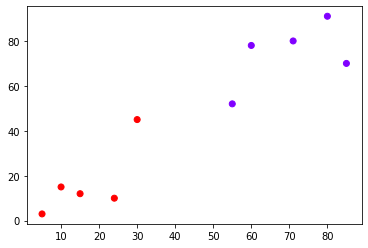

In [8]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')

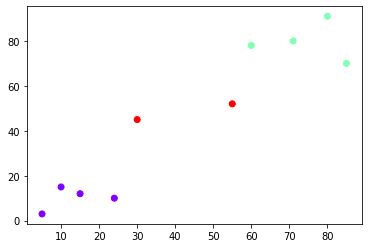

In [9]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 2, 1, 1, 1, 2, 1])

In [12]:
kmeans.cluster_centers_

array([[13.5 , 10.  ],
       [74.  , 79.75],
       [42.5 , 48.5 ]])

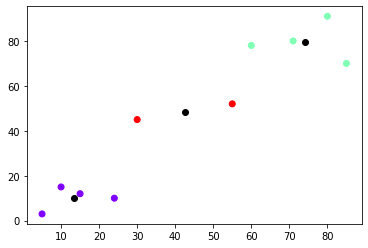

In [15]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           color='black')

In [16]:
Xtest=np.array([[4,5],[40,40]])
testClassification=kmeans.predict(Xtest)
testClassification

array([0, 2])

[0 2]


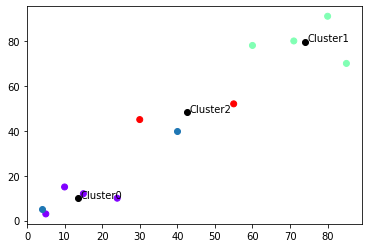

In [17]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
Xtest=np.array([[4,5],[40,40]])
print(kmeans.predict(Xtest))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(Xtest[:,0],Xtest[:,1],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black');
for i,val in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster{i}',(val[0]+0.7,val[1]))

Mall Customers:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [25]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [20]:
dataset.shape

(200, 5)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
customers=dataset.iloc[:,[3,4]].values
customers[:2]

array([[15, 39],
       [15, 81]], dtype=int64)

In [27]:
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(customers)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

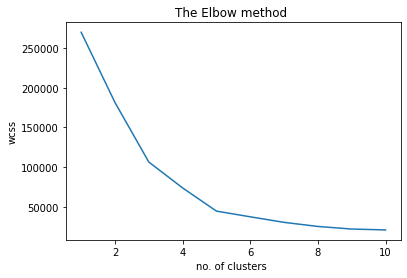

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method ')
plt.xlabel('no. of clusters ')
plt.ylabel('wcss')
plt.show()

In [30]:
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans = kmeansmodel.fit_predict(customers)

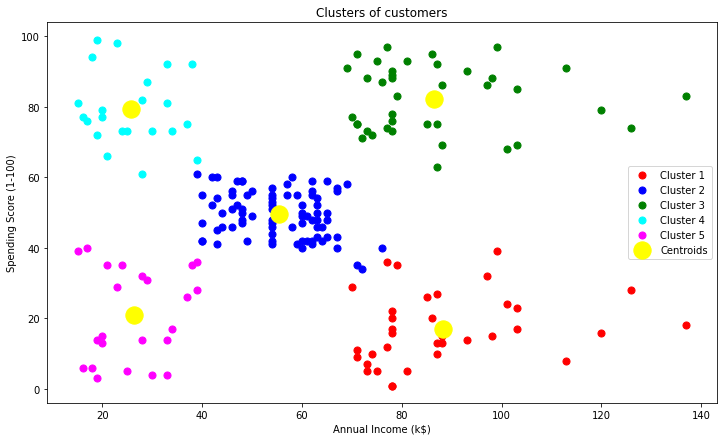

In [31]:
plt.figure(figsize=(12,7))

plt.scatter(customers[y_kmeans == 0, 0], customers[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(customers[y_kmeans == 1, 0], customers[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(customers[y_kmeans == 2, 0], customers[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(customers[y_kmeans == 3, 0], customers[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(customers[y_kmeans == 4, 0], customers[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();